#  Introuction

#Import basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning_Projects/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Data Preprocessing

In [ ]:
# To get first five records
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# To get number of Rows & Columns
df.shape

(1470, 35)

In [ ]:
# To get properties of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Drop unwanted columns
# EmployeeCount,EmployeeNumber,Over18,StandardHours
df["EmployeeCount"].unique()

array([1])

In [ ]:
 df["EmployeeNumber"].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068])

In [ ]:
df["Over18"].unique()

array(['Y'], dtype=object)

In [ ]:
df["StandardHours"].unique()

array([80])

In [ ]:
# Our obeservation is saying the above columns doesnot affect into the process of model building.
# Hence we have decided to remove all the above columns
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)
 

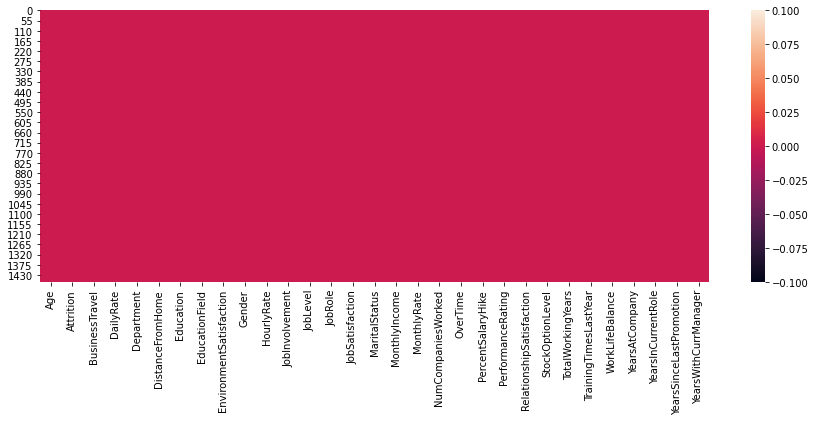

In [ ]:
# Visulization of null values by using Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# Null values in %
df.isnull().sum()/df.shape[0]*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
YearsSinceLastPromotion     0.0
YearsWithCurrManager        0.0
dtype: f

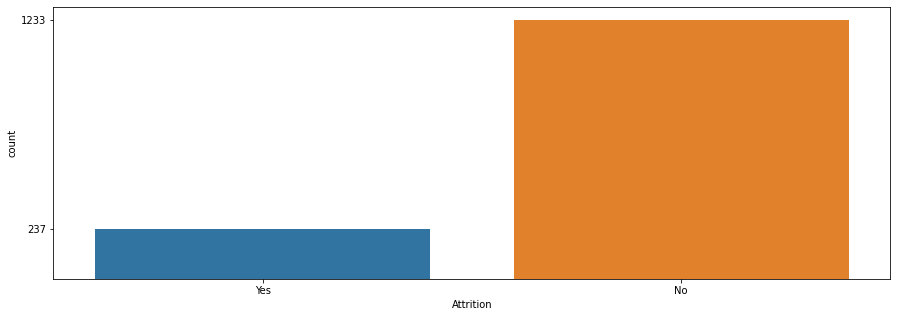

In [ ]:
# CountPlot
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Attrition')
plt.yticks(df['Attrition'].value_counts())
plt.show()

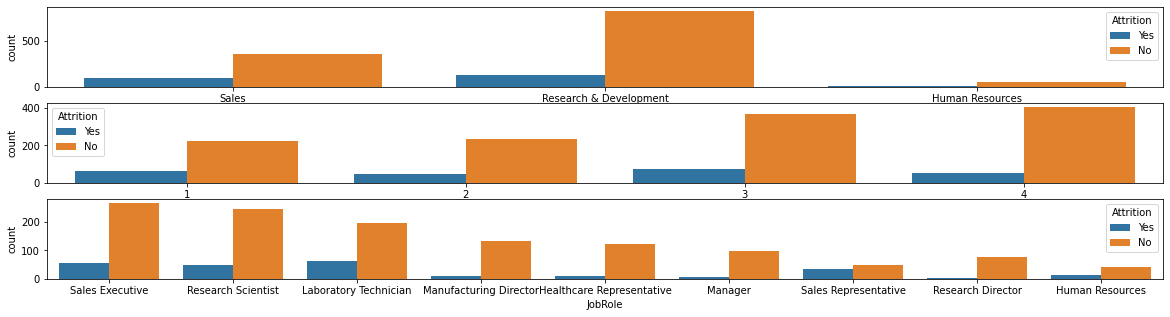

In [ ]:
# Subplot
plt.figure(figsize=(20,5))
plt.subplot(311)
sns.countplot(data=df,x="Department",hue="Attrition")

plt.subplot(312)
sns.countplot(x="JobSatisfaction",hue="Attrition",data=df)

plt.subplot(313)
sns.countplot(x="JobRole",hue="Attrition",data=df)

In [ ]:

# Machine only knows numerical figures.
# In this dataset we have categorical("strings") values also.
# so we need to convert them into numerical values.
# For convertion form categorical values to Numerical values we need to have segrigate such values and put into 
# diffrent diffrent data frames.
df_cat=df.select_dtypes('object') 
df_num=df.select_dtypes(['int64','float64']) 

In [ ]:
# Convertion of categorical values to Numerical values.
# we have two methods for such process:
# 1] LabelEncoder
# 2] One Hot Encoder
# Here we will used LabelEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
le=LabelEncoder()
for col in df_cat:
  df_cat[col]=le.fit_transform(df_cat[col])

In [ ]:
# check LabelEncoder method applicable or not
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Attrition       1470 non-null   int64
 1   BusinessTravel  1470 non-null   int64
 2   Department      1470 non-null   int64
 3   EducationField  1470 non-null   int64
 4   Gender          1470 non-null   int64
 5   JobRole         1470 non-null   int64
 6   MaritalStatus   1470 non-null   int64
 7   OverTime        1470 non-null   int64
dtypes: int64(8)
memory usage: 92.0 KB


In [ ]:
# Crete new data frame by concating categorical & numerical dataframe
new_df=pd.concat([df_num,df_cat],axis=1)

In [ ]:
# Check new data frame
new_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,2,2,1,0,7,2,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,1,1,1,6,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,2,1,4,1,2,2,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,1,1,0,6,1,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,2,1,3,1,2,1,0


In [ ]:
df_new1=new_df.drop("Attrition",axis=1)

In [ ]:
df_new1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,2,2,1,0,7,2,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,1,1,1,6,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,2,1,4,1,2,2,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,1,1,0,6,1,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,2,1,3,1,2,1,0


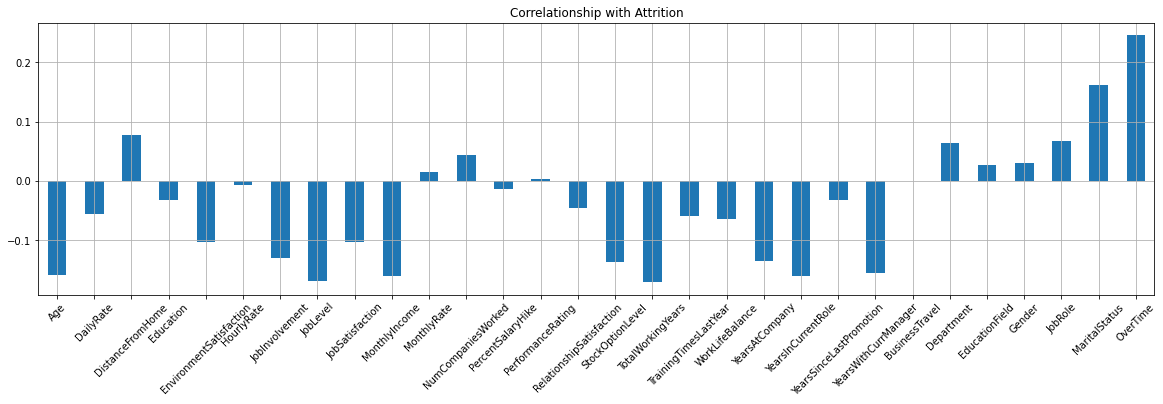

In [ ]:
# correlationship between input & output data set by using Barplot
df_new1.corrwith(new_df["Attrition"]).plot.bar(figsize=(20,5),title="Correlationship with Attrition",grid=True,rot=45)

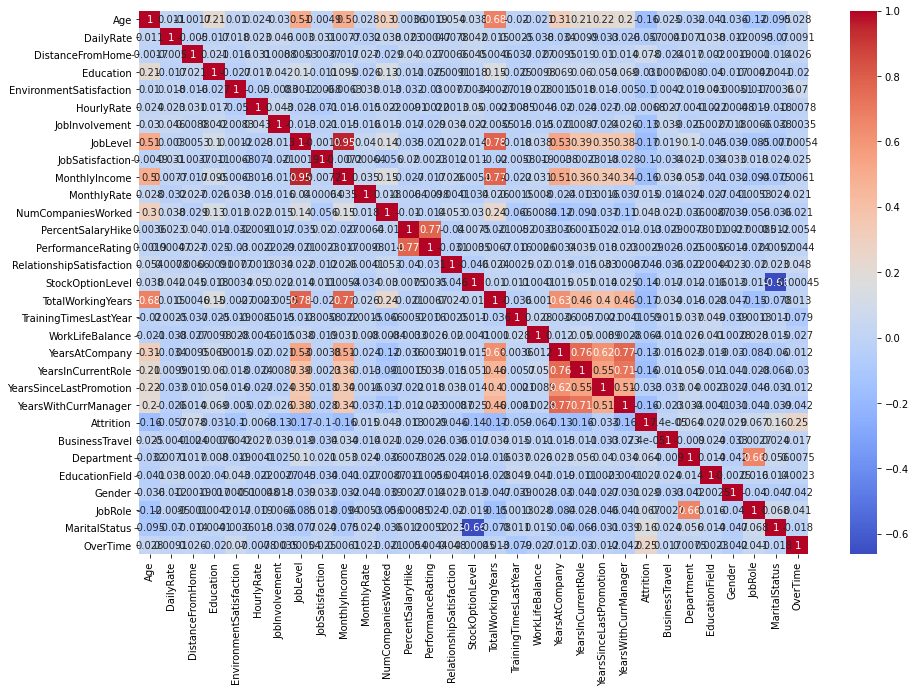

In [ ]:
# correlationship between input & output data set by using Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data=new_df.corr(),annot=True,cmap="coolwarm")
plt.show()

# Split data into X & Y

In [ ]:
x=new_df.drop("Attrition",axis=1)
y=new_df["Attrition"]

# Divide data for train(80%) & Test(20%)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Scalling input data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Balancing of Output data

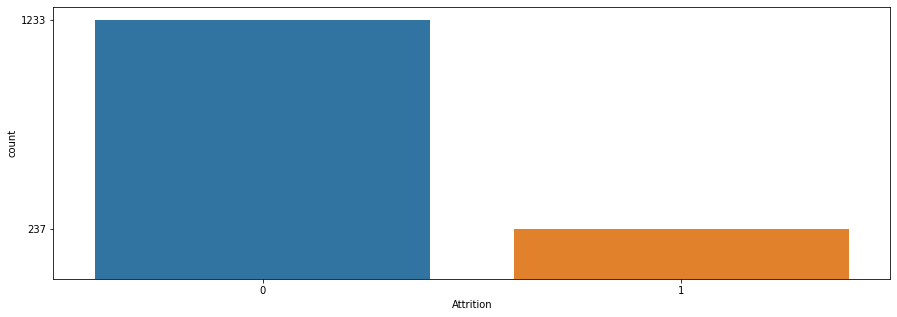

In [ ]:
#  Visualiztion of Output by using countplot
plt.figure(figsize=(15,5))
sns.countplot(data=new_df,x="Attrition") 
plt.yticks(new_df["Attrition"].value_counts())
plt.show()

In [ ]:
# Checking of output data in figures
pd.Series(y_train).value_counts()


0    988
1    188
Name: Attrition, dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

0    245
1     49
Name: Attrition, dtype: int64

In [ ]:
# by looking above two table its clearly indicating that output data is imbalance.
# here we need to balance output data,for this we have two methods:
# 1] Randomoversampling
# 2] Randomundersampling
# Here we will apply RandomOverSampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_train_sample,y_train_sample=ros.fit_resample(x_train,y_train)
x_test_sample,y_test_sample=ros.fit_resample(x_test,y_test)

In [ ]:
# Verifying sampling metod apply or not
pd.Series(y_train_sample).value_counts()

1    988
0    988
dtype: int64

In [ ]:
pd.Series(y_test_sample).value_counts()

1    245
0    245
dtype: int64

# Training of Model

In [ ]:
# Create user define function
def create_model(model):
  model.fit(x_train_sample,y_train_sample)
  y_pred=model.predict(x_test_sample)
  print(classification_report(y_test_sample,y_pred))
  print(confusion_matrix(y_test_sample,y_pred))
  return model

# 1] Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       245
           1       0.75      0.73      0.74       245

    accuracy                           0.74       490
   macro avg       0.74      0.74      0.74       490
weighted avg       0.74      0.74      0.74       490

[[186  59]
 [ 67 178]]


In [ ]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=lr,X=x_train_sample,y=y_train_sample,cv=5)
print("Accuracy is:",accuracy.mean()*100)

Accuracy is: 74.99897711290117


# 2] RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,max_features=20,random_state=0)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.57      0.97      0.72       245
           1       0.89      0.28      0.42       245

    accuracy                           0.62       490
   macro avg       0.73      0.62      0.57       490
weighted avg       0.73      0.62      0.57       490

[[237   8]
 [177  68]]


In [ ]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=rfc,X=x_train_sample,y=y_train_sample,cv=5)
print("Accuracy is:",accuracy.mean()*100)

Accuracy is: 97.01406469760899


# 3] Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='poly',random_state=0)
create_model(svc)

              precision    recall  f1-score   support

           0       0.60      0.94      0.73       245
           1       0.86      0.38      0.52       245

    accuracy                           0.66       490
   macro avg       0.73      0.66      0.63       490
weighted avg       0.73      0.66      0.63       490

[[230  15]
 [153  92]]


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=svc,X=x_train_sample,y=y_train_sample,cv=5)
print("Accuracy is:",accuracy.mean()*100)

Accuracy is: 93.21800281293953


# 4]XGBClassifier

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
xgb=XGBClassifier()
create_model(xgb)

              precision    recall  f1-score   support

           0       0.63      0.87      0.73       245
           1       0.80      0.49      0.61       245

    accuracy                           0.68       490
   macro avg       0.71      0.68      0.67       490
weighted avg       0.71      0.68      0.67       490

[[214  31]
 [124 121]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=xgb,X=x_train_sample,y=y_train_sample,cv=5)
print("Accuracy is:",accuracy.mean()*100)

Accuracy is: 90.38447768827515


# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameter={
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'multi_class':['auto', 'ovr',],
    'max_iter':[100,200,300,400,500,600]
     
}

In [ ]:
rsc=RandomizedSearchCV(estimator=lr,param_distributions=parameter,n_iter=10,n_jobs=-1,verbose=3,cv=5,)

In [ ]:
rsc.fit(x_train_sample,y_train_sample)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'multi_class': ['auto', 'ovr'],
                                        'penalty': ['l1', 'l2', 'elasticne

In [ ]:
rsc.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
rsc.best_score_

0.7504948216340621

# Final Model

In [ ]:
lr1=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='ovr', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr1=create_model(lr1)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       245
           1       0.75      0.73      0.74       245

    accuracy                           0.74       490
   macro avg       0.75      0.74      0.74       490
weighted avg       0.75      0.74      0.74       490

[[187  58]
 [ 67 178]]


In [ ]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=lr1,X=x_train_sample,y=y_train_sample,cv=5)
print("Accuracy is:",accuracy.mean()*100)

Accuracy is: 75.04948216340621
